# Credit Card Fraud Detection System
**<h2> Using Data Analytics and Machine Learning </h2>**
* **1. Introduction**
  * 1.1 Initializing the Environment
* **2. Data Cleaning and Analytics**
    * 2.1 Load data
    * 2.2 Check for missing values
    * 2.3 Finding max,min and std of each column
    * 2.4 Histogram of each predictor columns
    * 2.5 Heatmap Correlation
* **3. Data Visualization and Normalization**
    * 3.1 Bar Plot of Class Column - Fraud vs Normal 
    * 3.2 Randomized Under Sampling and Normalization
    * 3.3 Time vs Fraud
    * 3.4 Amount vs Fraud 
* **4. Selection of Machine Learning Model and Reporting the Accuracy of the Models**
    * 4.1 LightGBM Model Implementation
    * 4.2 Adaboost Model Implementation
    * 4.3 Random Forest Classifier Implementation

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['creditcard.csv']


## 2. Data Cleaning
### 2.1 Importing the essential libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

### 2.2 Reading the dataset

In [3]:
df=pd.read_csv('../input/creditcard.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

### 2.3 Understanding the dataset by finding the max,min and std of each variable

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
print(df.isnull().values.any())
for col in df:
    print(col)
    print(format(df[col].unique()))

False
Time
[0.00000e+00 1.00000e+00 2.00000e+00 ... 1.72787e+05 1.72788e+05
 1.72792e+05]
V1
[-1.35980713  1.19185711 -1.35835406 ...  1.91956501 -0.24044005
 -0.53341252]
V2
[-0.07278117  0.26615071 -1.34016307 ... -0.30125385  0.53048251
 -0.18973334]
V3
[ 2.53634674  0.16648011  1.77320934 ... -3.24963981  0.70251023
  0.70333737]
V4
[ 1.37815522  0.44815408  0.37977959 ... -0.55782812  0.68979917
 -0.50627124]
V5
[-0.33832077  0.06001765 -0.50319813 ...  2.63051512 -0.37796113
 -0.01254568]
V6
[ 0.46238778 -0.08236081  1.80049938 ...  3.0312601   0.62370772
 -0.64961669]
V7
[ 0.23959855 -0.07880298  0.79146096 ... -0.29682653 -0.68617999
  1.57700625]
V8
[ 0.0986979   0.08510165  0.24767579 ...  0.70841718  0.67914546
 -0.41465041]
V9
[ 0.36378697 -0.25542513 -1.51465432 ...  0.43245405  0.39208671
  0.48617951]
V10
[ 0.09079417 -0.16697441  0.20764287 ... -0.48478176 -0.39912565
 -0.91542665]
V11
[-0.55159953  1.61272666  0.62450146 ...  0.41161374 -1.93384882
 -1.04045834]
V12
[-

### 2.4 Histogram of each of the predictor columns

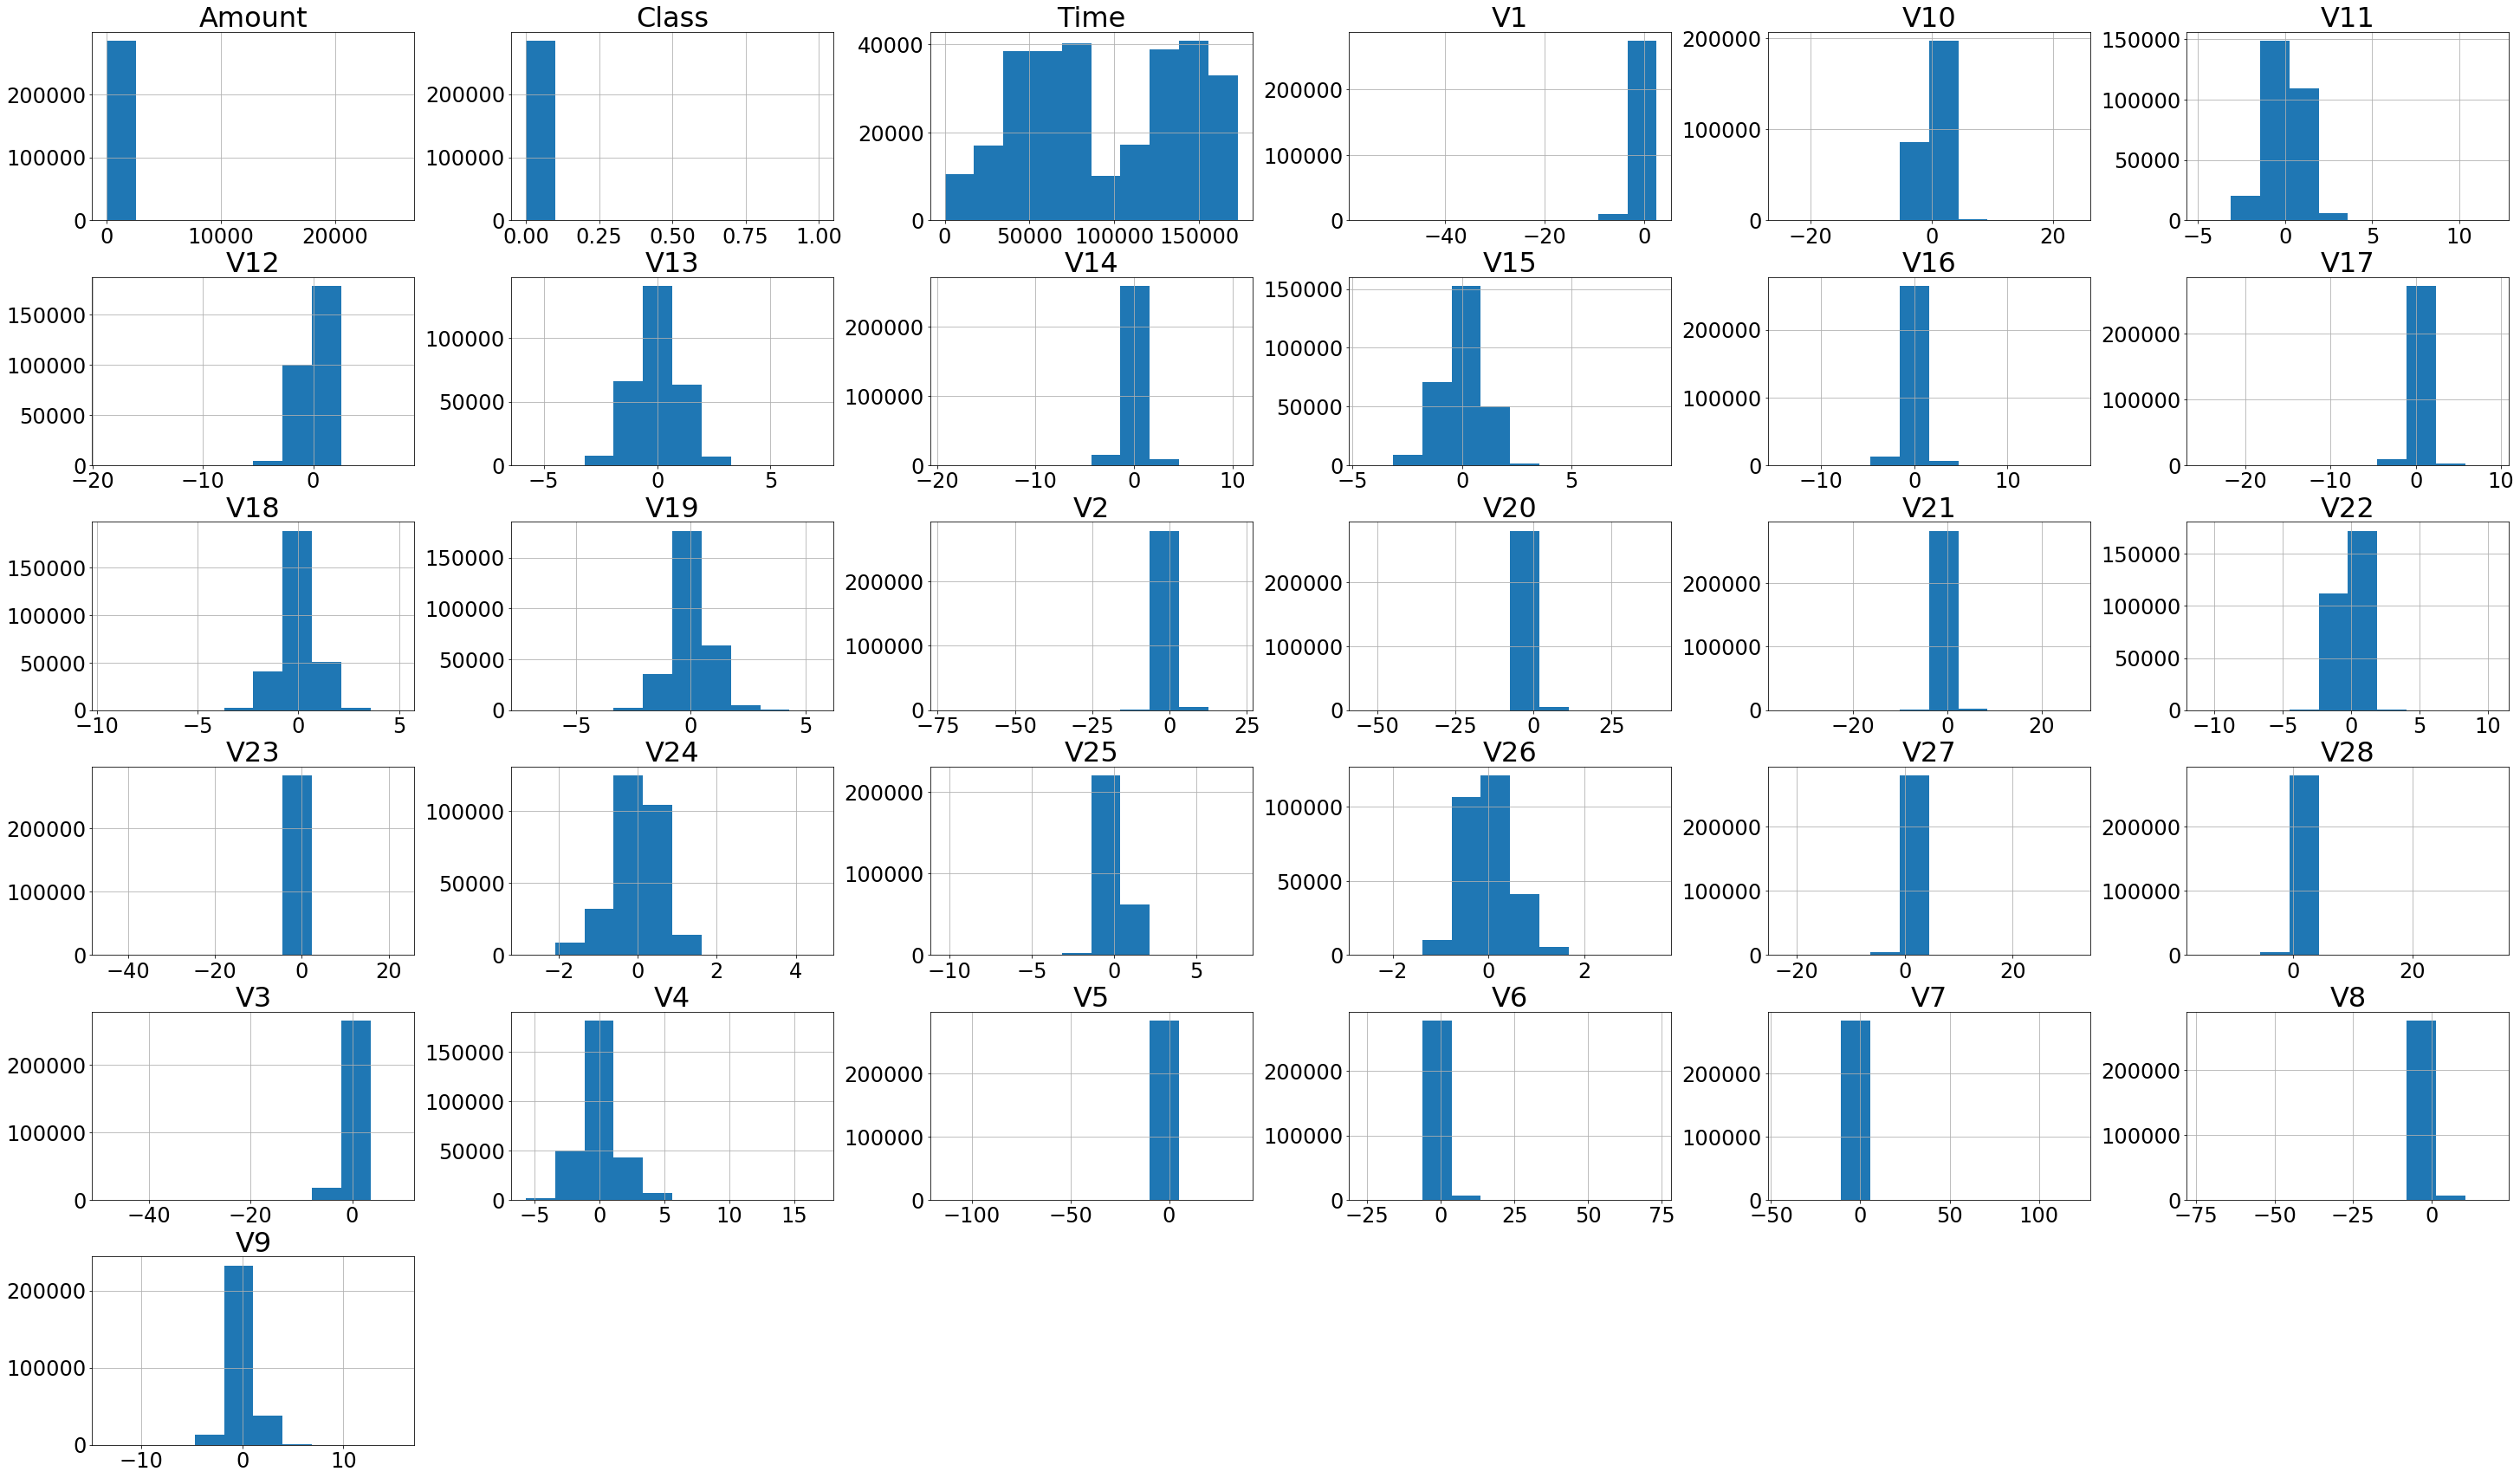

In [6]:
#plt.rcParams['figure.figsize']= (200,200)
params = {'axes.titlesize':'32',
          'xtick.labelsize':'24',
          'ytick.labelsize':'24'}
plt.rcParams.update(params)
hist=df.hist(figsize=(50, 30))
#ax=fig.gca() 
#hist=df.hist()

### 2.5 Heatmap of the variables

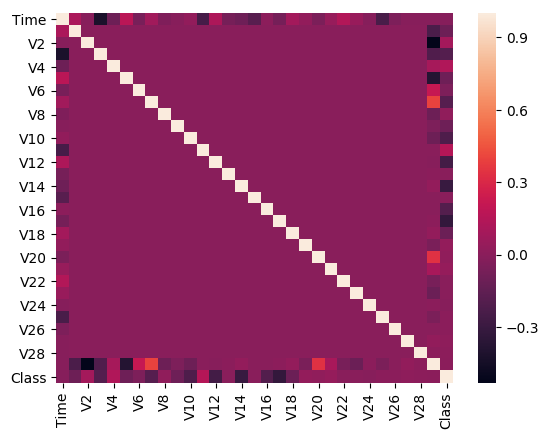

In [7]:
plt.rcParams.update(plt.rcParamsDefault)
corr=df.corr()
sns.heatmap(corr)

## 3. Data Visualization
### 3.1 Plot Fraud vs Genuine

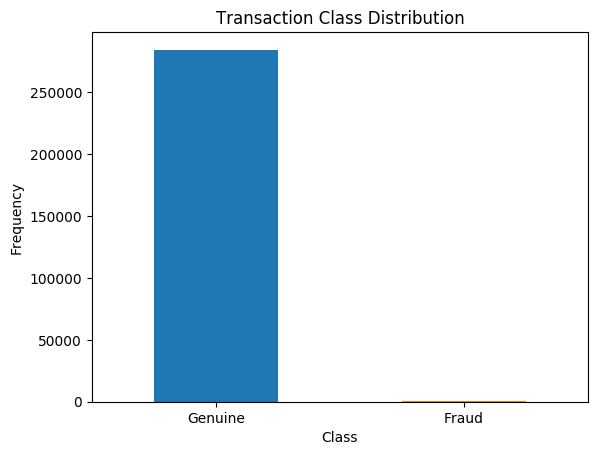

In [8]:
plt.rcParams.update(plt.rcParamsDefault)
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), ['Genuine','Fraud'])
plt.xlabel("Class")
plt.ylabel("Frequency");

## 3.2 Randomized Under Sampling and Normalization using Standard Scaler

In [9]:
df = df.sample(frac=1)
fraud_df = df.loc[df['Class'] == 1]
normal_df = df.loc[df['Class'] == 0][:int(2.5*len(fraud_df))]
ndf=pd.DataFrame()
ndf=ndf.append(fraud_df, ignore_index=True)
ndf=ndf.append(normal_df, ignore_index=True)
ndf=ndf.sample(frac=1)
y=ndf.Class
X=ndf.iloc[:,:-1]
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.33, random_state=42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_test=y_test.values
print("Total Fraud Cases in test dataset:",len(y_test[y_test==1]))

Total Fraud Cases in test dataset: 156


### 3.3 Time vs Class

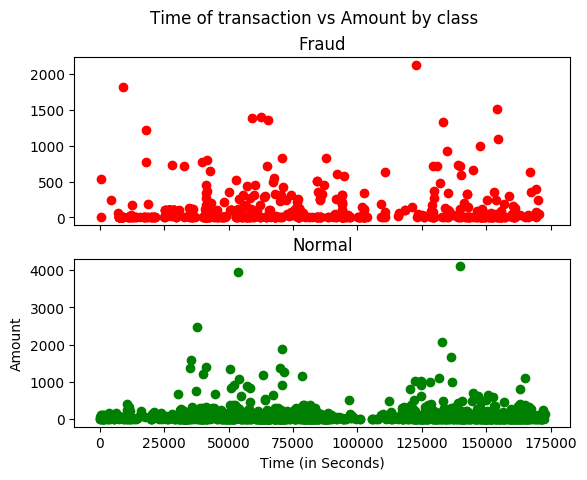

In [10]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud_df.Time,fraud_df.Amount,color='red')
ax1.set_title('Fraud')
ax2.scatter(normal_df.Time, normal_df.Amount,color='green')
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

### 3.4 Amount vs Class

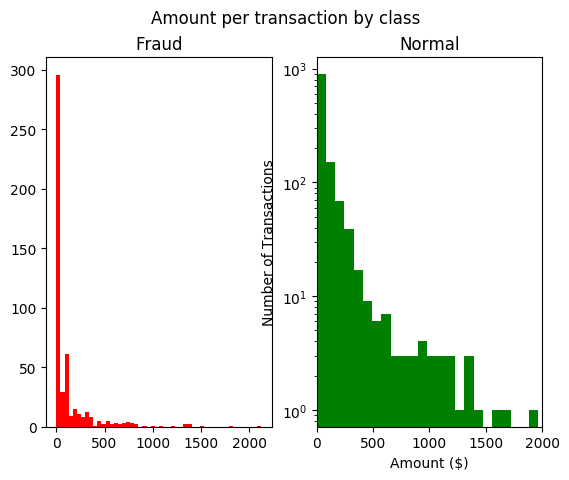

In [11]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex=False)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud_df.Amount, bins = bins,color='red')
ax1.set_title('Fraud')
ax2.hist(normal_df.Amount, bins = bins,color='green')
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 2000))
plt.yscale('log')
plt.show();

# 4.Selection of ML Model and Reporting it's Accuracy
## 4.1 LightGBM Model Implementation

In [12]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 50
params['min_data'] = 50
params['max_depth'] = 100
params['num_iterations']=750
clf = lgb.train(params, d_train, 100)



y_pred=clf.predict(X_test)
#convert into binary values
for i in range(len(X_test)):
    if y_pred[i]>=.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0
y_pred = y_pred.astype(np.int64)

/opt/conda/lib/python3.6/site-packages/lightgbm/engine.py:116: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Light GBM Prediction

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:",cm)
#Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)
print("Accuracy:",accuracy)
print("Precision:",cm[1][1]/(cm[1][1]+cm[0][1]))# cm[1][1]-Actual and Predicted both Fraud
                                                # cm[0][1]-Actual Not Fraud Predicted Fraud
print("Recall:",cm[1][1]/(cm[1][1]+cm[1][0]))# cm[1][1]-Actual and Predicted both Fraud
                                             # cm[1][0]-Actual Fraud Predicted Not fraud

Confusion Matrix: [[410   3]
 [ 21 135]]
Accuracy: 0.9578207381370826
Precision: 0.9782608695652174
Recall: 0.8653846153846154


## 4.2 Adaboost Classifier Implementation

In [14]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=200,learning_rate=0.03)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:",cm)
print("Precision:",cm[1][1]/(cm[1][1]+cm[0][1]))# cm[1][1]-Actual and Predicted both Fraud
                                                # cm[0][1]-Actual Not Fraud Predicted Fraud
print("Recall:",cm[1][1]/(cm[1][1]+cm[1][0]))# cm[1][1]-Actual and Predicted both Fraud
                                             # cm[1][0]-Actual Fraud Predicted Not fraud

Accuracy: 0.9560632688927944
Confusion Matrix: [[408   5]
 [ 20 136]]
Precision: 0.9645390070921985
Recall: 0.8717948717948718


## 4.3 Random Forest Classifier Implementation

In [15]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:",cm)
print("Precision:",cm[1][1]/(cm[1][1]+cm[0][1]))# cm[1][1]-Actual and Predicted both Fraud
                                                # cm[0][1]-Actual Not Fraud Predicted Fraud
print("Recall:",cm[1][1]/(cm[1][1]+cm[1][0]))# cm[1][1]-Actual and Predicted both Fraud
                                             # cm[1][0]-Actual Fraud Predicted Not fraud

Accuracy: 0.9595782073813708
Confusion Matrix: [[408   5]
 [ 18 138]]
Precision: 0.965034965034965
Recall: 0.8846153846153846
